# Logistic Regression Notebook
---
Por Aldo Garcia Castañeda

## 1.1 Fundamentos de la técnica
La **regresión logística** es un método de **clasificación supervisada** usado principalmente para problemas binarios.
En lugar de predecir un valor continuo (como en la regresión lineal), estima la **probabilidad** de pertenecer a la clase positiva.

El algoritmo de regresión logística nos ayuda a encontrar la mejor función logística que describa la relación entre X y Y

La clave del modelo es aplicar una función logística (sigmoide) a una combinación lineal de las características:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Esta función transforma cualquier valor real a un rango entre 0 y 1.

## 1.2 Modelo Matemático
Sea el vector de características:

$$
\mathbf{x} = [x_1, x_2, ..., x_n]^T
$$

y los parámetros del modelo:

$$
\mathbf{w} = [w_0, w_1, ..., w_n]^T
$$

La combinación lineal se define como:

$$
z = w_0 + w_1 x_1 + \dots + w_n x_n = \mathbf{w}^T \mathbf{x'}
$$


La probabilidad estimada de que \(y=1\) es:

$$
\hat{p} = P(y = 1 \mid \, \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x'}) = \frac{1}{1 + e^{-w^T x}}
$$

Regla de decisión:

$$
\hat{y} = \begin{cases}
1, & \text{si } \hat{p} \ge 0.5 \\
0, & \text{si } \hat{p} < 0.5
\end{cases}
$$

### Función de Costo (Log-Loss o Entropía Cruzada)

$$
\mathcal{L}(w) = -\sum_i \left[ y_i \log \hat{y}_i + (1 - y_i)\log(1 - \hat{y}_i) \right]
$$

El objetivo es encontrar $\mathbf{w}$ que minimice esta función.

## 1.3 Descripción de la librería (scikit-learn) - clases y funciones relevantes
- `scikit-learn`: modelos, métricas y preprocesamiento.
- `matplotlib`: visualizaciones.
- `seaborn`: librería para visualización estadística basada en matplotlib, con gráficos más estilizados.
- `pandas`: librería para manipulación de datos estructurados en forma de DataFrames.
- `numpy`: librería para operaciones numéricas eficientes con arrays y álgebra lineal.

**Funciones relevantes**
- `from sklearn.model_selection import train_test_split`: divide el dataset en entrenamiento y pruebas
- `from sklearn.preprocessing import StandardScaler`: escala los datos
- `from sklearn.linear_model import LogisticRegression`: modelo de regresion logistica
- `from sklearn.metrics import confusion_matrix, accuracy_score`: funciones de metrica
- `from sklearn.datasets import load_iris`: dataset predeterminado de "iris"

## 1.4 Pipeline

### 1.4.1 Preprocesamiento (datos con ruido)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


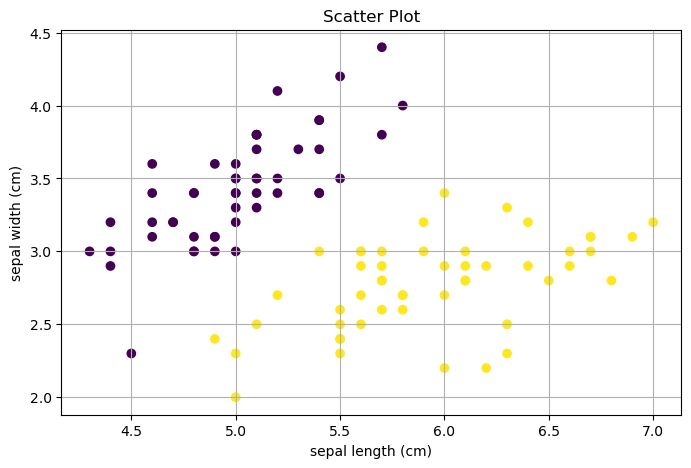

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

# Fix the random seed for reproducibility
np.random.seed(42)

# Load the Iris dataset
iris = load_iris()
X_full = iris.data          # Features of all iris samples
y_full = iris.target        # Labels (0 = setosa, 1 = versicolor, 2 = virginica)

# Filter out class "2" (virginica) to keep only two classes (binary classification)
mask = y_full != 2
X = X_full[mask]
y = y_full[mask]

# Create a DataFrame for easier visualization and analysis
cols = iris.feature_names
df = pd.DataFrame(X, columns=cols)
df['target'] = y

# Display descriptive statistics of the noisy dataset
display(df.describe())

# Plot a scatter plot of the first two features with noise added
plt.figure(figsize=(8,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['target'])
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

# Prepare data for modeling
X = df[cols].values
y = df['target'].values

# Standardize features for machine learning
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


### 1.4.2 Entrenamiento del modelo

In [2]:
# Create a Logistic Regression model instance
model = LogisticRegression()

# Train (fit) the model using the training data
model.fit(X_train, y_train)

# Print the learned coefficients for each feature
print('Coeficientes:', model.coef_)

# Print the intercept term of the logistic regression model
print('Intercept:', model.intercept_)


Coeficientes: [[ 0.8049434  -1.06072221  1.41671616  1.44462953]]
Intercept: [0.25756026]


### 1.4.3 Predicción

In [3]:
# Define a function to predict the class of a new pattern (input vector)
def predecir_clase(patron_raw):
    # Convert the raw input list into a numpy array and reshape it as a single sample
    patron = np.array(patron_raw).reshape(1, -1)
    
    # Apply the same scaling used during training
    patron_scaled = scaler.transform(patron)
    
    # Get the predicted probability of belonging to class 1
    prob = model.predict_proba(patron_scaled)[0, 1]
    
    # Get the predicted class label (0 or 1)
    pred = model.predict(patron_scaled)[0]
    
    # Print both the predicted class and its probability
    print(f"Clase predicha: {pred}  | Probabilidad de ser clase 1: {prob:.4f}")

# Test the function with a sample pattern
predecir_clase([5.0, 3.5, 1.3, 0.3])

Clase predicha: 0  | Probabilidad de ser clase 1: 0.0178


### 1.4.4 Evaluación del modelo

In [4]:
# Use the trained model to predict the labels of the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix comparing true vs. predicted labels
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print('Matriz de confusión:')
print(cm)

# Calculate and print the accuracy of the model on the test data
print('Accuracy:', accuracy_score(y_test, y_pred))

Matriz de confusión:
[[17  0]
 [ 0 13]]
Accuracy: 1.0


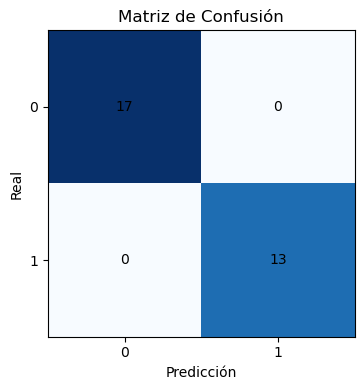

In [5]:
plt.figure(figsize=(5,4))

# Display the confusion matrix as an image (heatmap style)
plt.imshow(cm, cmap='Blues')

# Add title and axis labels
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')   # Predicted labels
plt.ylabel('Real')         # True labels

# Write the numeric values inside each cell of the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center', color='black')

# Set the tick labels for binary classes (0 and 1)
plt.xticks([0, 1])
plt.yticks([0, 1])

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

## 2. Notebook
El presente notebook se puedan interpretar y ejecutar, sin errores, en Jupyter y/o Google Colab

## Referencias Bibliográficas
- Aviña Méndez, J. A. (abril). LR-Light [Diapositivas]. Google Classroom.
- ChatGPT
- IBM. (2025, 17 noviembre). Logistic Regression. https://www.ibm.com/think/topics/logistic-regression
- LogisticRegression. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html